In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Sensitivity of cchem parameterspace to temperature, salinity, DIC, TA, nut. 
 
    PLOT omega, pH for : 
        TA=DIC=2000 at T = 5-25, S = 0 - 35
        


In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/VIZ')
import mocsy
import VIZ_plots as VP

import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from oct2py import octave
import seawater as sw
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib import reload
plt.style.use('ggplot')
import netCDF4 as nc
import numpy as np
import cmocean as cm

""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

%matplotlib inline

In [3]:
xdim = 30
ydim = 30
TA = np.zeros([ydim,xdim])
DIC = np.zeros([ydim,xdim])

S = np.zeros_like(DIC)
T = np.zeros_like(DIC)
P = np.zeros_like(DIC)
S[:] = 30
T[:] = 10
P[:] = 1

topDIC = 2500
lowDIC = 1000

topTA = 2500
lowTA = 1000

step = (topDIC-lowDIC)/ydim
print(step)

for i in range(0,ydim):
    DIC[i,:] = lowDIC + (topDIC-lowDIC)/ydim *(i)
for i in range(0,xdim):
    TA[:,i] = lowTA + (topTA-lowTA)/ydim *(i)

# print(DIC)
# print(TA)


Sr = np.ravel(S)
Tr = np.ravel(T)  
Pr = np.ravel(P)  
DICr = np.ravel(DIC) * 1e-3
TAr = np.ravel(TA) * 1e-3

zero = DICr *0

response_tup = mocsy.mvars(temp=Tr, sal=Sr, alk=TAr, dic=DICr, 
                   sil=zero, phos=zero, patm=Pr, depth=zero, lat=zero, 
                    optcon='mol/m3', optt='Tinsitu', optp='m',
                    optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

pHr = pH.reshape(xdim,ydim)
OmegaAr = OmegaA.reshape(xdim,ydim) 
pco2r = pco2.reshape(xdim,ydim) 

# print('*OMA*')
# print(OmegaA)

50.0


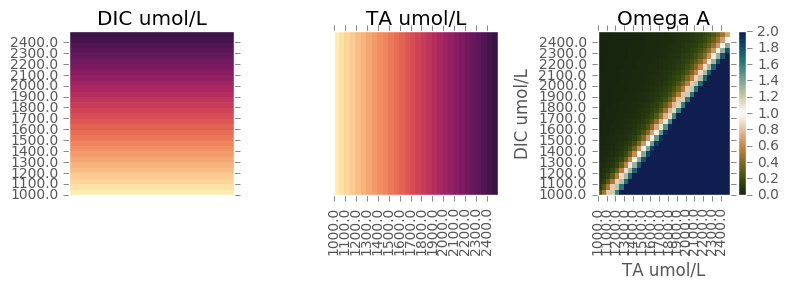

In [4]:
fact = 2
fig = plt.figure(figsize=(8,3))
nop = 3
for i in range(1,nop+1):
    ax = fig.add_subplot(1,nop,i)

    if i == 1:
        v_min = lowDIC
        v_max = topDIC
        
        tplt = DIC
        mesh = ax.pcolormesh(tplt, cmap=cm.cm.matter, vmin=v_min, vmax=v_max)

        major_ySP = np.arange(0, ydim, (1 * fact))
        y_labSP = np.arange(lowDIC, topDIC, (step* fact))
        ax.set_yticks(major_ySP)
        ax.set_yticklabels(y_labSP) 
        ax.set_xticklabels([])
        ax.set_xticks([])
        plt.title('DIC umol/L')
        ax.set_xlim([0,xdim])
        ax.set_ylim([0,ydim])
#         major_xSP = np.arange(0, xdim, 1)


    
    if i == 2:
        v_min = lowTA
        v_max = topTA
        tplt = TA
        mesh = ax.pcolormesh(tplt, cmap=cm.cm.matter, vmin=v_min, vmax=v_max)
        
        major_xSP = np.arange(0, xdim, (1 * fact))
        x_labSP = np.arange(v_min, v_max, (step* fact))
        ax.set_xticks(major_xSP)
        ax.set_xticklabels(x_labSP,rotation='vertical') 
        ax.set_yticklabels([])
        ax.set_yticks([])
        plt.title('TA umol/L')
        ax.set_xlim([0,xdim])
        ax.set_ylim([0,ydim])
#         major_xSP = np.arange(0, xdim, 1)
        
    if i == 3:
        v_min = 0
        v_max = 2
        tplt = OmegaAr
        mesh = ax.pcolormesh(tplt, cmap=cm.cm.tarn, vmin=v_min, vmax=v_max)
        cbar = fig.colorbar(mesh, ax=ax)
        major_xSP = np.arange(0, xdim, (1 * fact))
        x_labSP = np.arange(lowTA, topTA, (step* fact))
        ax.set_xticks(major_xSP)
        ax.set_xticklabels(x_labSP,rotation='vertical') 
        
        major_ySP = np.arange(0, ydim, (1 * fact))
        y_labSP = np.arange(lowDIC, topDIC, (step* fact))
        ax.set_yticks(major_ySP)
        ax.set_yticklabels(y_labSP)
        ax.set_ylabel('DIC umol/L')
        ax.set_xlabel('TA umol/L')
        ax.set_xlim([0,xdim])
        ax.set_ylim([0,ydim])
        plt.title('Omega A')
            
    
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

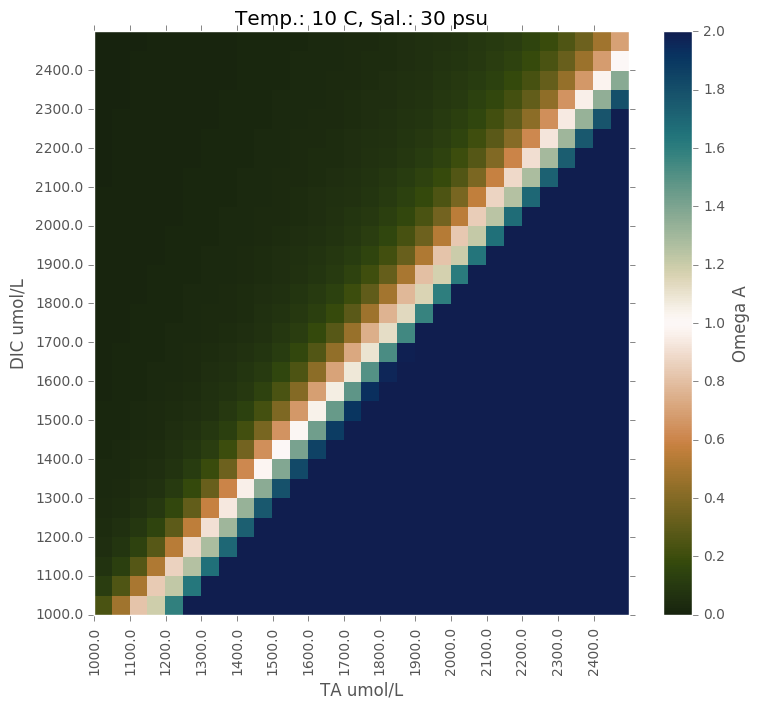

In [5]:
fact = 2
tf = 0.9
fig = plt.figure(figsize=(8.7*tf,8*tf))
nop = 1
for i in range(1,nop+1):
    ax = fig.add_subplot(1,nop,i)

        
    if i == 1:
        v_min = 0
        v_max = 2
        tplt = OmegaAr
        mesh = ax.pcolormesh(tplt, cmap=cm.cm.tarn, vmin=v_min, vmax=v_max)
        cbar = fig.colorbar(mesh, ax=ax)
        cbar.set_label('Omega A')
        major_xSP = np.arange(0, xdim, (1 * fact))
        x_labSP = np.arange(lowTA, topTA, (step* fact))
        ax.set_xticks(major_xSP)
        ax.set_xticklabels(x_labSP,rotation='vertical') 
        
        major_ySP = np.arange(0, ydim, (1 * fact))
        y_labSP = np.arange(lowDIC, topDIC, (step* fact))
        ax.set_yticks(major_ySP)
        ax.set_yticklabels(y_labSP)
        ax.set_ylabel('DIC umol/L')
        ax.set_xlabel('TA umol/L')
        ax.set_xlim([0,xdim])
        ax.set_ylim([0,ydim])
        plt.title('Temp.: '+ str(int(T[0,0])) + ' C, Sal.: '+str(int(S[0,0])) + ' psu')

            
    
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

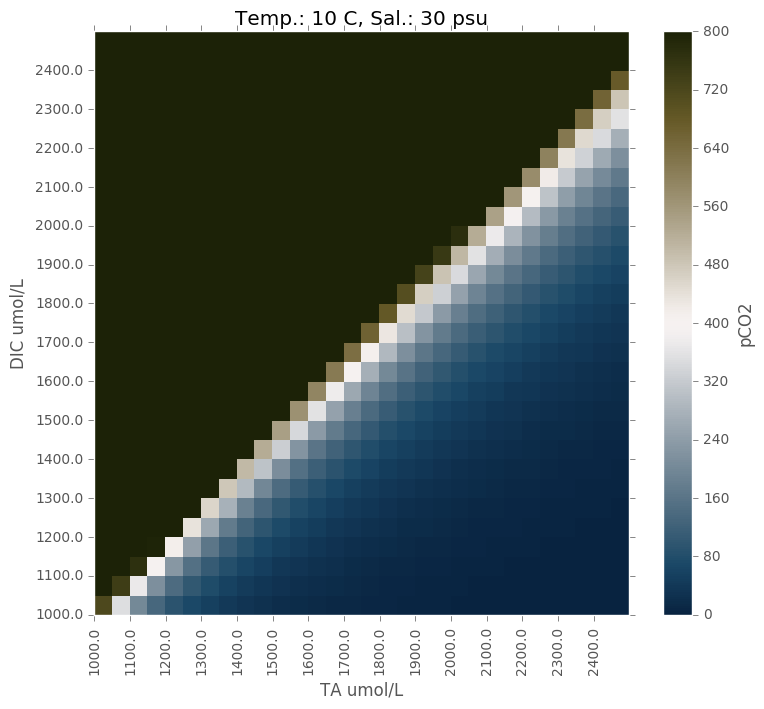

In [6]:
fact = 2
tf = 0.9
fig = plt.figure(figsize=(8.7*tf,8*tf))
nop = 1
for i in range(1,nop+1):
    ax = fig.add_subplot(1,nop,i)

    if i == 1:
        v_min = 0
        v_max = 800
        tplt = pco2r
        mesh = ax.pcolormesh(tplt, cmap=cm.cm.diff, vmin=v_min, vmax=v_max)
        cbar = fig.colorbar(mesh, ax=ax)
        cbar.set_label('pCO2')
        major_xSP = np.arange(0, xdim, (1 * fact))
        x_labSP = np.arange(lowTA, topTA, (step* fact))
        ax.set_xticks(major_xSP)
        ax.set_xticklabels(x_labSP,rotation='vertical') 
        
        major_ySP = np.arange(0, ydim, (1 * fact))
        y_labSP = np.arange(lowDIC, topDIC, (step* fact))
        ax.set_yticks(major_ySP)
        ax.set_yticklabels(y_labSP)
        ax.set_ylabel('DIC umol/L')
        ax.set_xlabel('TA umol/L')
        ax.set_xlim([0,xdim])
        ax.set_ylim([0,ydim])
        plt.title('Temp.: '+ str(int(T[0,0])) + ' C, Sal.: '+str(int(S[0,0])) + ' psu')
        figtit = './pco2_T' + str(int(T[0,0])) + '_S'+str(int(S[0,0])) +'.jpg'
    
fig.tight_layout() 
plt.show()
fig.savefig(figtit)

In [7]:
Tr = 10
Sr = 25
TAr = 2300 * 1e-3
DICr = 1800 * 1e-3
zero = 0 

response_tup = mocsy.mvars(temp=Tr, sal=Sr, alk=TAr, dic=DICr, 
                   sil=zero, phos=zero, patm=zero, depth=zero, lat=zero, 
                    optcon='mol/m3', optt='Tinsitu', optp='m',
                    optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

print(pH)
print(pco2)
print(OmegaA)

[ 8.71489408]
[ 64.03526794]
[ 5.5104074]


In [9]:
def make_plawts_diff(tT,tS):
    
    xdim = 30
    ydim = 30
    TA = np.zeros([ydim,xdim])
    DIC = np.zeros([ydim,xdim])

    S = np.zeros_like(DIC)
    T = np.zeros_like(DIC)
    P = np.zeros_like(DIC)
    S[:] = tS
    T[:] = tT
    P[:] = 1

    topDIC = 2500
    lowDIC = 1000
    topTA = 2500
    lowTA = 1000

    step = (topDIC-lowDIC)/ydim
    print(step)

    for i in range(0,ydim):
        DIC[i,:] = lowDIC + (topDIC-lowDIC)/ydim *(i)
    for i in range(0,xdim):
        TA[:,i] = lowTA + (topTA-lowTA)/ydim *(i)

    Sr = np.ravel(S)
    Tr = np.ravel(T)  
    Pr = np.ravel(P)  
    DICr = np.ravel(DIC) * 1e-3
    TAr = np.ravel(TA) * 1e-3

    zero = DICr *0

    response_tup = mocsy.mvars(temp=Tr, sal=Sr, alk=TAr, dic=DICr, 
                       sil=zero, phos=zero, patm=Pr, depth=zero, lat=zero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

    pHr = pH.reshape(xdim,ydim)
    OmegaAr = OmegaA.reshape(xdim,ydim) 
    pco2r = pco2.reshape(xdim,ydim) 
    
    ticsz = 15
    lsiz = 15
    fact = 2
    tf = 0.7
    fig = plt.figure(figsize=(8.9*tf,8*tf))
    nop = 1
    for i in range(1,nop+1):
        ax = fig.add_subplot(1,nop,i)

        if i == 1:
            v_min = 0
            v_max = 800
            tplt = pco2r
            mesh = ax.pcolormesh(tplt, cmap=cm.cm.balance, vmin=v_min, vmax=v_max)
            cbar = fig.colorbar(mesh, ax=ax)
            cbar.set_label('pCO2', fontsize = ticsz)
            cbar.ax.tick_params(labelsize=ticsz)
            major_xSP = np.arange(0, xdim, (1 * fact))
            x_labSP = np.arange(lowTA, topTA, (step* fact))
            ax.set_xticks(major_xSP)
            ax.set_xticklabels(x_labSP,rotation='vertical', fontsize = ticsz) 

            major_ySP = np.arange(0, ydim, (1 * fact))
            y_labSP = np.arange(lowDIC, topDIC, (step* fact))
            ax.set_yticks(major_ySP)
            ax.set_yticklabels(y_labSP, fontsize = ticsz)
            ax.set_ylabel('DIC umol/L', fontsize = lsiz)
            ax.set_xlabel('TA umol/L', fontsize = lsiz)
            ax.set_xlim([0,xdim])
            ax.set_ylim([0,ydim])
            plt.title('Temp.: '+ str(int(T[0,0])) + ' C, Sal.: '+str(int(S[0,0])) + ' psu', fontsize = lsiz)
            figtit = './pco2_T' + str(int(T[0,0])) + '_S'+str(int(S[0,0])) +'.jpg'
    print(figtit)
    fig.tight_layout() 
    plt.show()
    fig.savefig(figtit)
    
    fig = plt.figure(figsize=(8.9*tf,8*tf))
    nop = 1
    for i in range(1,nop+1):
        ax = fig.add_subplot(1,nop,i)


        if i == 1:
            v_min = 0
            v_max = 2
            tplt = OmegaAr
            mesh = ax.pcolormesh(tplt, cmap=cm.cm.balance, vmin=v_min, vmax=v_max)
            cbar = fig.colorbar(mesh, ax=ax)
            cbar.set_label('Omega A', fontsize = ticsz)
            cbar.ax.tick_params(labelsize=ticsz)
            major_xSP = np.arange(0, xdim, (1 * fact))
            x_labSP = np.arange(lowTA, topTA, (step* fact))
            ax.set_xticks(major_xSP)
            ax.set_xticklabels(x_labSP,rotation='vertical', fontsize = ticsz) 

            major_ySP = np.arange(0, ydim, (1 * fact))
            y_labSP = np.arange(lowDIC, topDIC, (step* fact))
            ax.set_yticks(major_ySP)
            ax.set_yticklabels(y_labSP, fontsize = ticsz)
            ax.set_ylabel('DIC umol/L', fontsize = lsiz)
            ax.set_xlabel('TA umol/L', fontsize = lsiz)
            ax.set_xlim([0,xdim])
            ax.set_ylim([0,ydim])
            plt.title('Temp.: '+ str(int(T[0,0])) + ' C, Sal.: '+str(int(S[0,0])) + ' psu', fontsize = lsiz)



    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    figtit = './OmA_T' + str(int(T[0,0])) + '_S'+str(int(S[0,0])) +'.jpg'
    print(figtit)
    plt.show()
    fig.savefig(figtit)

50.0
./pco2_T5_S5.jpg


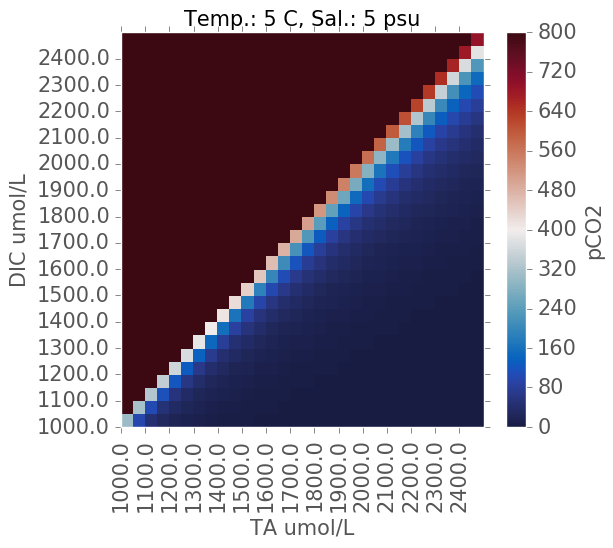

./OmA_T5_S5.jpg


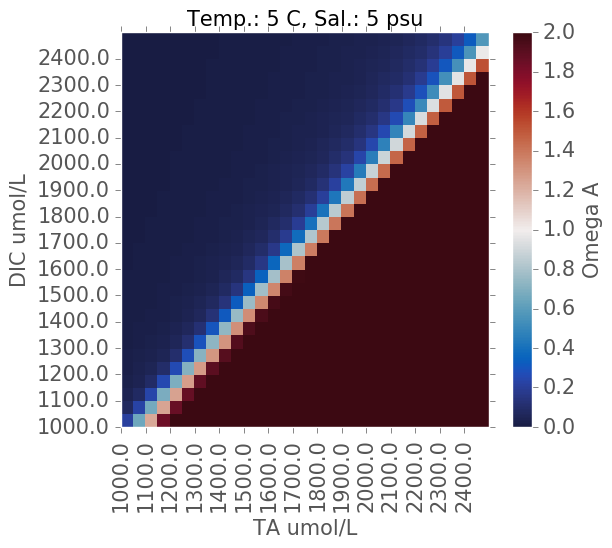

50.0
./pco2_T5_S20.jpg


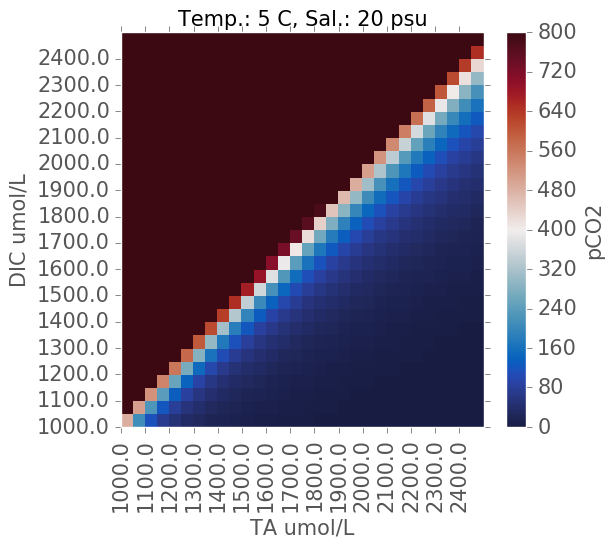

./OmA_T5_S20.jpg


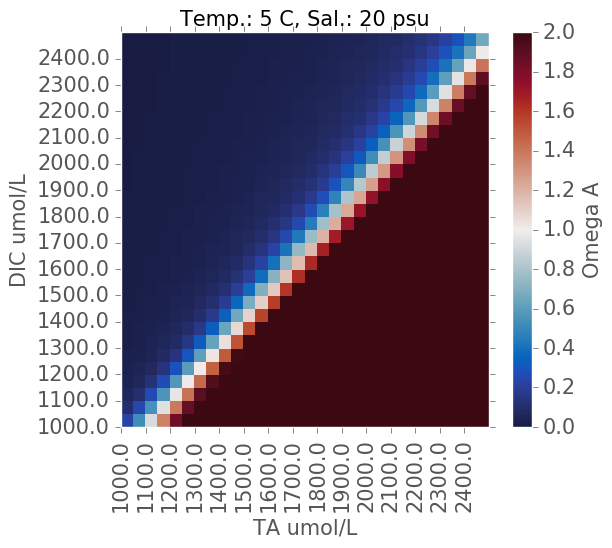

50.0
./pco2_T5_S30.jpg


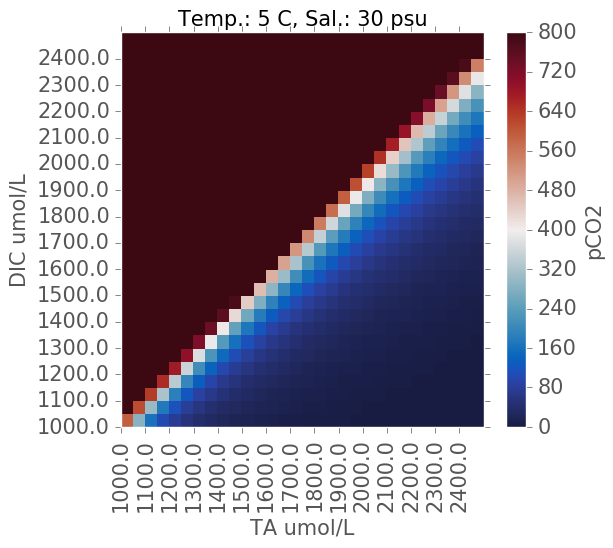

./OmA_T5_S30.jpg


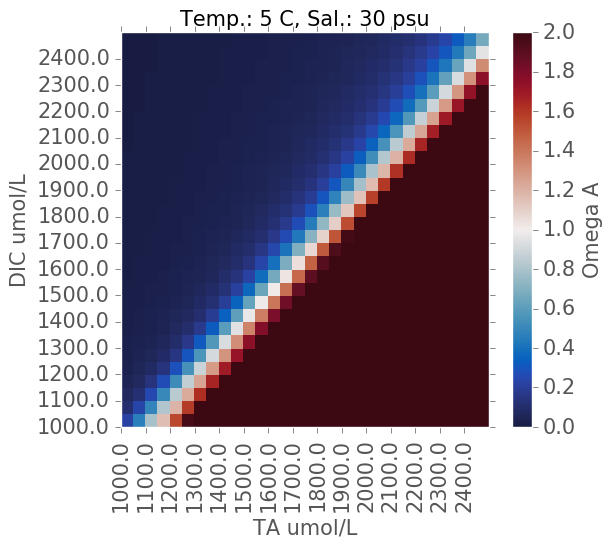

50.0
./pco2_T10_S5.jpg


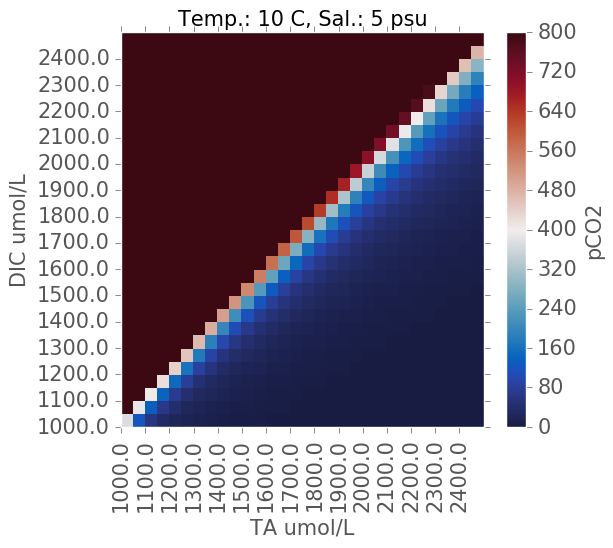

./OmA_T10_S5.jpg


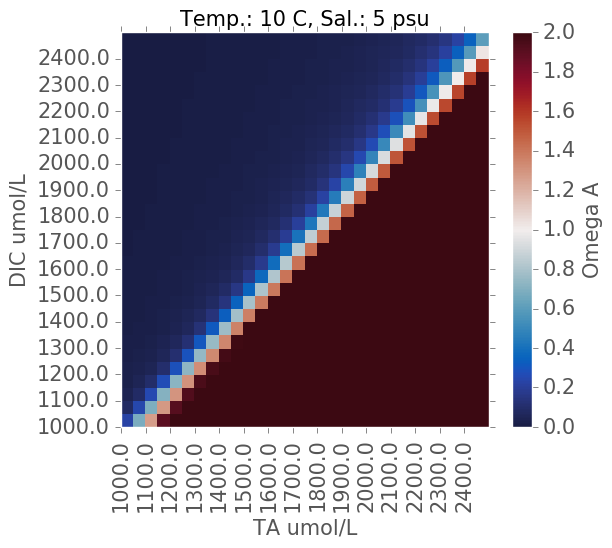

50.0
./pco2_T10_S20.jpg


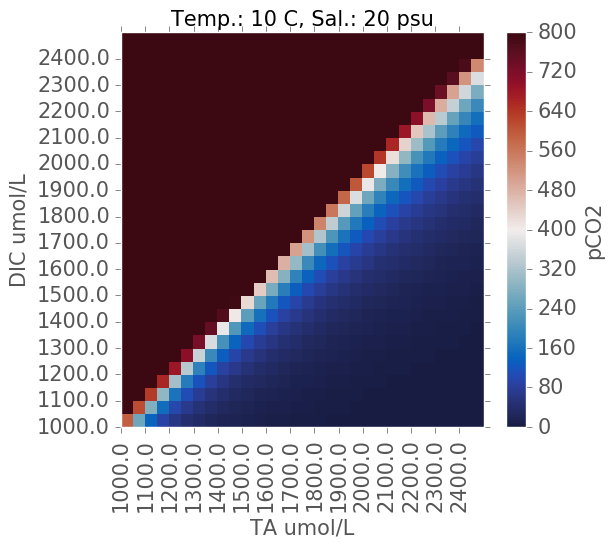

./OmA_T10_S20.jpg


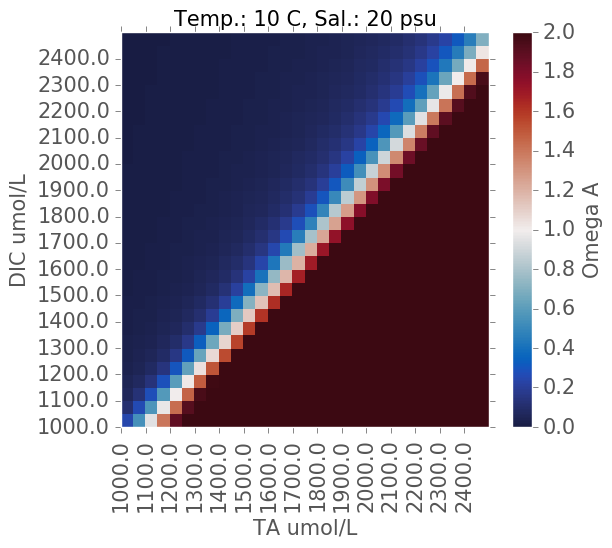

50.0
./pco2_T10_S30.jpg


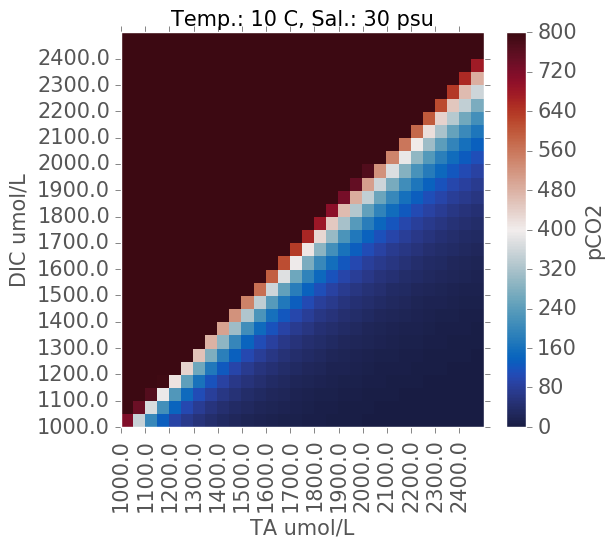

./OmA_T10_S30.jpg


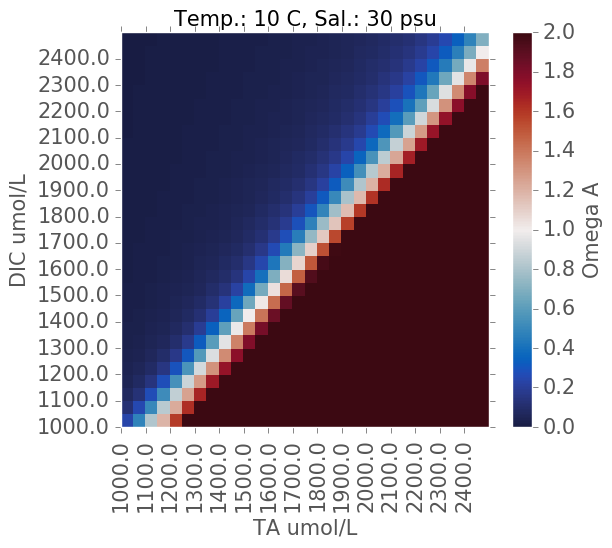

50.0
./pco2_T15_S5.jpg


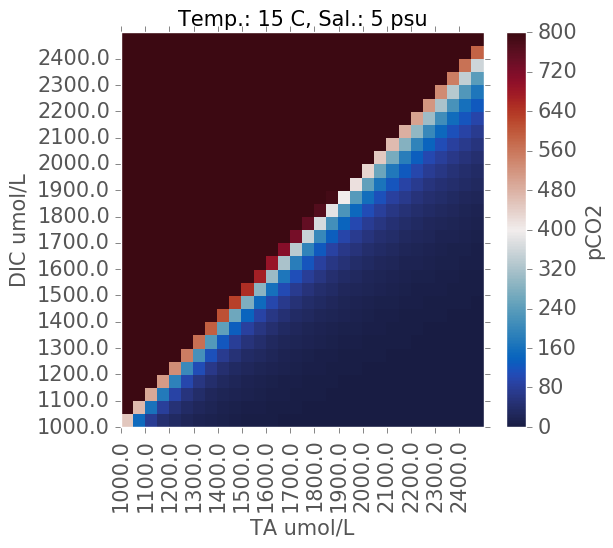

./OmA_T15_S5.jpg


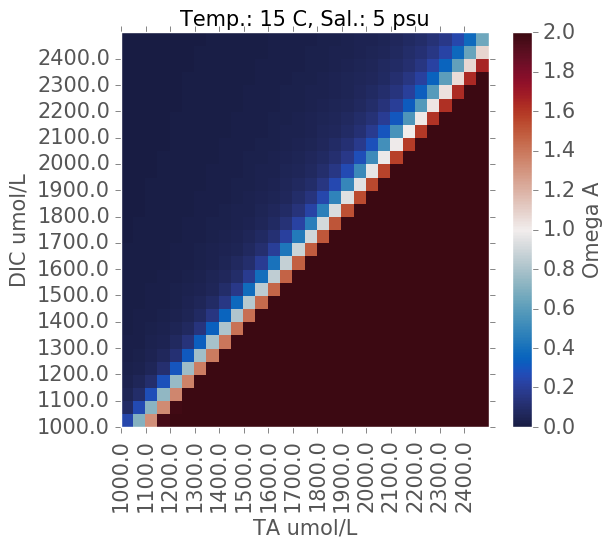

50.0
./pco2_T15_S20.jpg


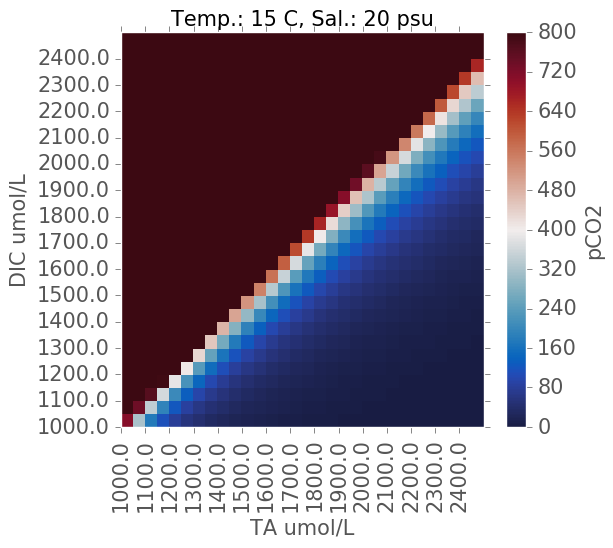

./OmA_T15_S20.jpg


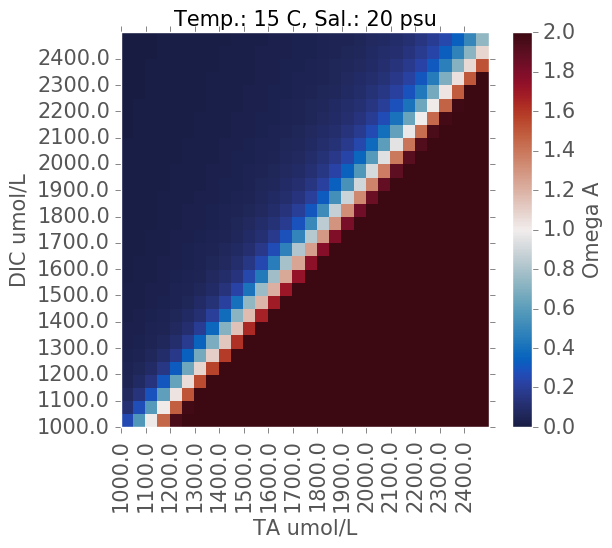

50.0
./pco2_T15_S30.jpg


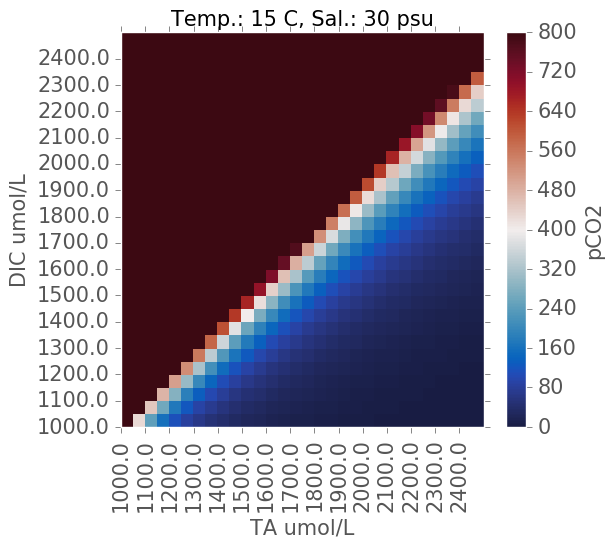

./OmA_T15_S30.jpg


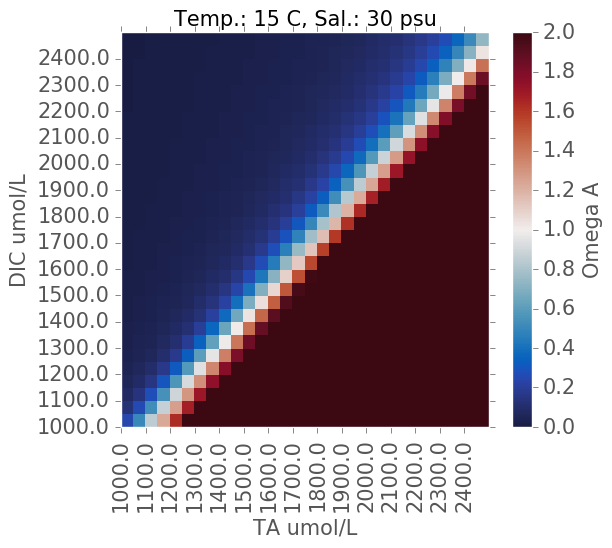

In [10]:
ts = [5,10,15]
ss = [5,20,30]

for i in range(0,len(ts)):
    for j in range(0,len(ss)):
        tT = ts[i]
        tS = ss[j]
        make_plawts(tT,tS)


In [11]:
def make_plawts_col(tT,tS):
    
    xdim = 30
    ydim = 30
    TA = np.zeros([ydim,xdim])
    DIC = np.zeros([ydim,xdim])

    S = np.zeros_like(DIC)
    T = np.zeros_like(DIC)
    P = np.zeros_like(DIC)
    S[:] = tS
    T[:] = tT
    P[:] = 1

    topDIC = 2500
    lowDIC = 1000
    topTA = 2500
    lowTA = 1000

    step = (topDIC-lowDIC)/ydim
    print(step)

    for i in range(0,ydim):
        DIC[i,:] = lowDIC + (topDIC-lowDIC)/ydim *(i)
    for i in range(0,xdim):
        TA[:,i] = lowTA + (topTA-lowTA)/ydim *(i)

    Sr = np.ravel(S)
    Tr = np.ravel(T)  
    Pr = np.ravel(P)  
    DICr = np.ravel(DIC) * 1e-3
    TAr = np.ravel(TA) * 1e-3

    zero = DICr *0

    response_tup = mocsy.mvars(temp=Tr, sal=Sr, alk=TAr, dic=DICr, 
                       sil=zero, phos=zero, patm=Pr, depth=zero, lat=zero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

    pHr = pH.reshape(xdim,ydim)
    OmegaAr = OmegaA.reshape(xdim,ydim) 
    pco2r = pco2.reshape(xdim,ydim) 
    
    ticsz = 15
    lsiz = 15
    fact = 2
    tf = 0.7
    fig = plt.figure(figsize=(8.9*tf,8*tf))
    nop = 1
    for i in range(1,nop+1):
        ax = fig.add_subplot(1,nop,i)

        if i == 1:
            v_min = 0
            v_max = 400
            tplt = pco2r
            mesh = ax.pcolormesh(tplt, cmap=cm.cm.thermal, vmin=v_min, vmax=v_max)
            cbar = fig.colorbar(mesh, ax=ax)
            cbar.set_label('pCO2', fontsize = ticsz)
            cbar.ax.tick_params(labelsize=ticsz)
            major_xSP = np.arange(0, xdim, (1 * fact))
            x_labSP = np.arange(lowTA, topTA, (step* fact))
            ax.set_xticks(major_xSP)
            ax.set_xticklabels(x_labSP,rotation='vertical', fontsize = ticsz) 

            major_ySP = np.arange(0, ydim, (1 * fact))
            y_labSP = np.arange(lowDIC, topDIC, (step* fact))
            ax.set_yticks(major_ySP)
            ax.set_yticklabels(y_labSP, fontsize = ticsz)
            ax.set_ylabel('DIC umol/L', fontsize = lsiz)
            ax.set_xlabel('TA umol/L', fontsize = lsiz)
            ax.set_xlim([0,xdim])
            ax.set_ylim([0,ydim])
            plt.title('Temp.: '+ str(int(T[0,0])) + ' C, Sal.: '+str(int(S[0,0])) + ' psu', fontsize = lsiz)
            figtit = './C_pco2_T' + str(int(T[0,0])) + '_S'+str(int(S[0,0])) +'.jpg'
    print(figtit)
    fig.tight_layout() 
    plt.show()
    fig.savefig(figtit)
    
    fig = plt.figure(figsize=(8.9*tf,8*tf))
    nop = 1
    for i in range(1,nop+1):
        ax = fig.add_subplot(1,nop,i)


        if i == 1:
            v_min = 0
            v_max = 4
            tplt = OmegaAr
            mesh = ax.pcolormesh(tplt, cmap=cm.cm.thermal, vmin=v_min, vmax=v_max)
            cbar = fig.colorbar(mesh, ax=ax)
            cbar.set_label('Omega A', fontsize = ticsz)
            cbar.ax.tick_params(labelsize=ticsz)
            major_xSP = np.arange(0, xdim, (1 * fact))
            x_labSP = np.arange(lowTA, topTA, (step* fact))
            ax.set_xticks(major_xSP)
            ax.set_xticklabels(x_labSP,rotation='vertical', fontsize = ticsz) 

            major_ySP = np.arange(0, ydim, (1 * fact))
            y_labSP = np.arange(lowDIC, topDIC, (step* fact))
            ax.set_yticks(major_ySP)
            ax.set_yticklabels(y_labSP, fontsize = ticsz)
            ax.set_ylabel('DIC umol/L', fontsize = lsiz)
            ax.set_xlabel('TA umol/L', fontsize = lsiz)
            ax.set_xlim([0,xdim])
            ax.set_ylim([0,ydim])
            plt.title('Temp.: '+ str(int(T[0,0])) + ' C, Sal.: '+str(int(S[0,0])) + ' psu', fontsize = lsiz)



    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    figtit = './C_OmA_T' + str(int(T[0,0])) + '_S'+str(int(S[0,0])) +'.jpg'
    print(figtit)
    plt.show()
    fig.savefig(figtit)

50.0
./C_pco2_T5_S5.jpg


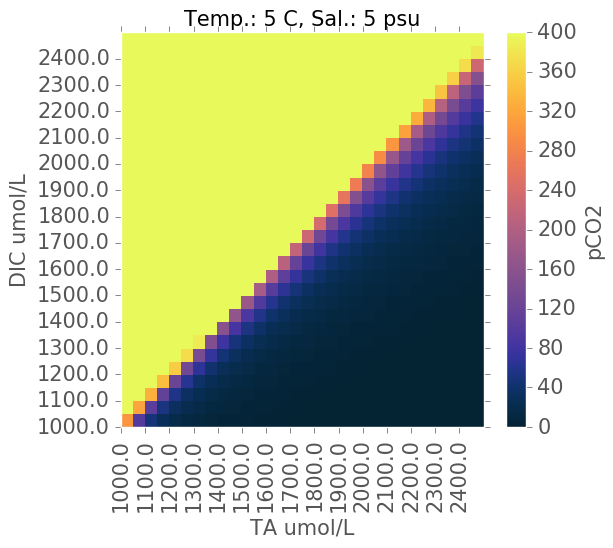

./C_OmA_T5_S5.jpg


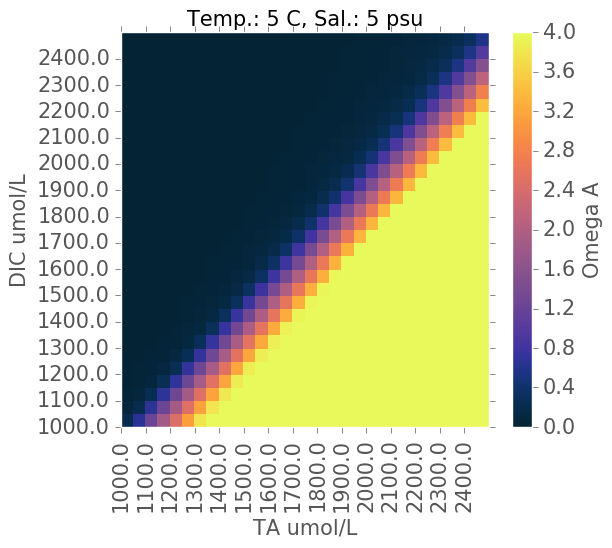

50.0
./C_pco2_T5_S20.jpg


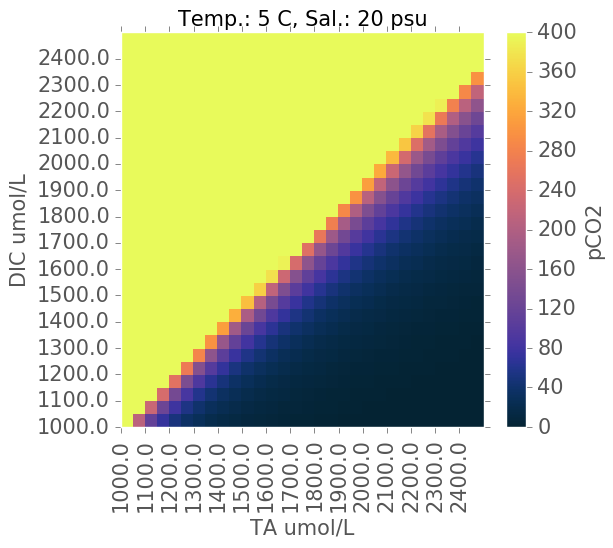

./C_OmA_T5_S20.jpg


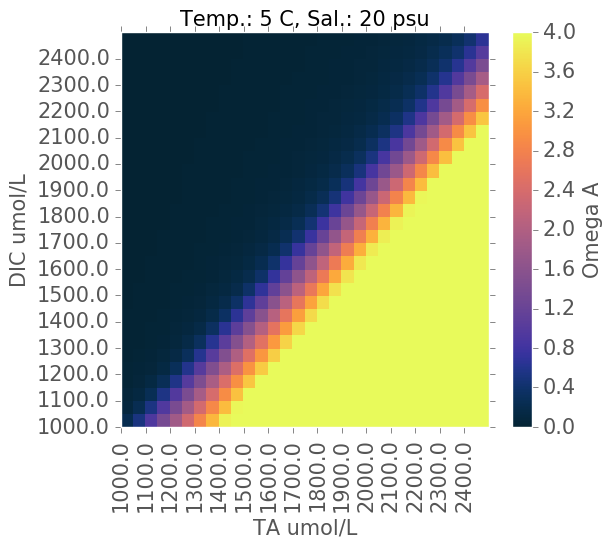

50.0
./C_pco2_T5_S30.jpg


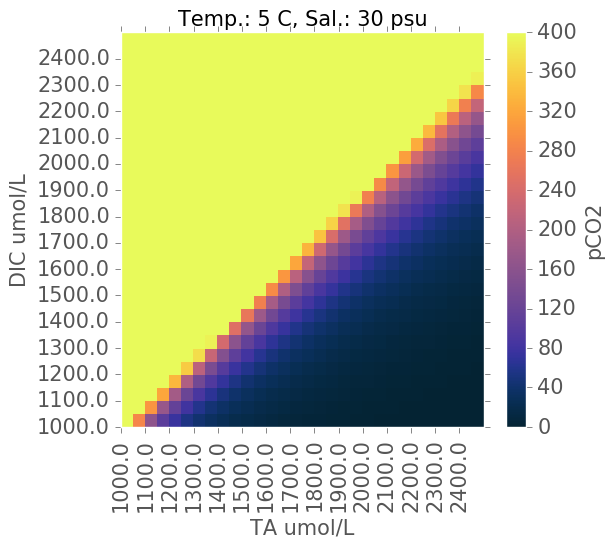

./C_OmA_T5_S30.jpg


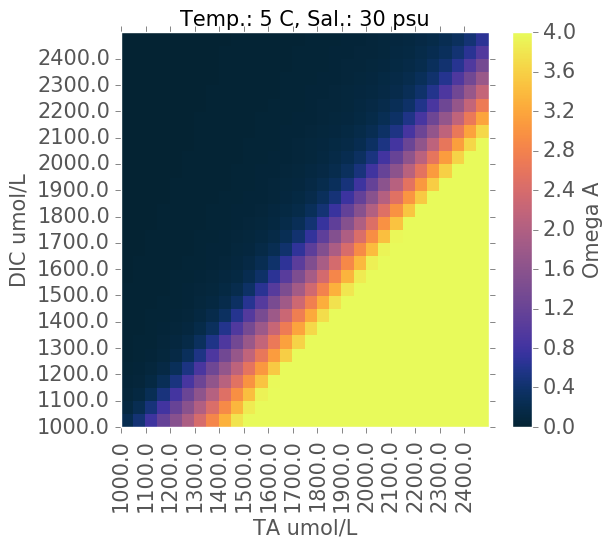

50.0
./C_pco2_T10_S5.jpg


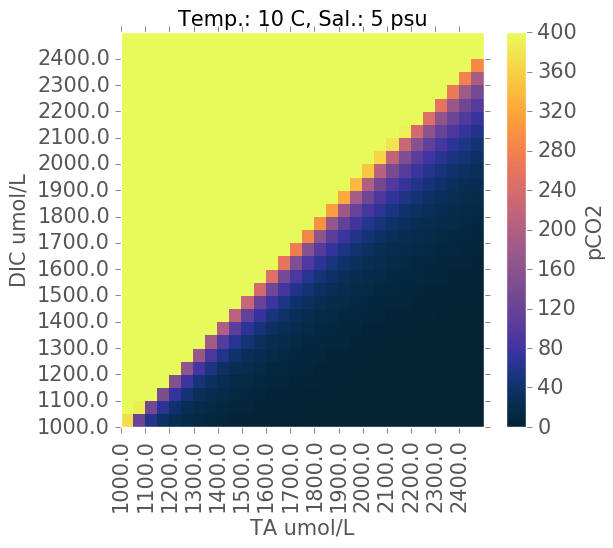

./C_OmA_T10_S5.jpg


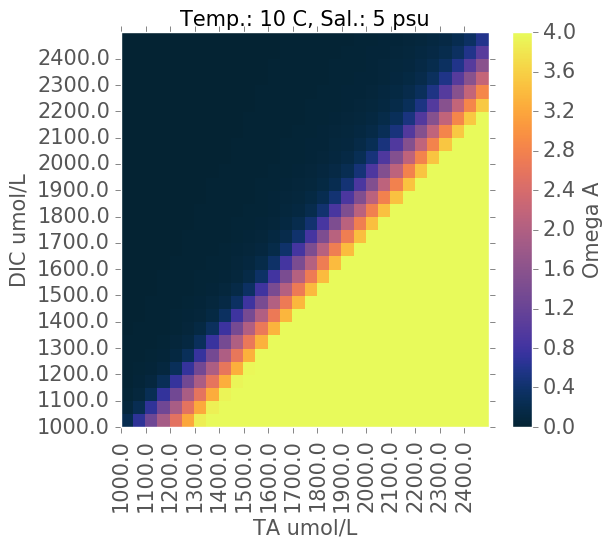

50.0
./C_pco2_T10_S20.jpg


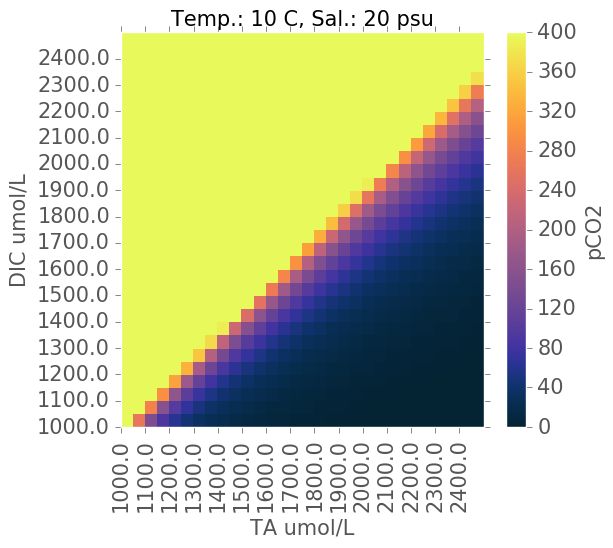

./C_OmA_T10_S20.jpg


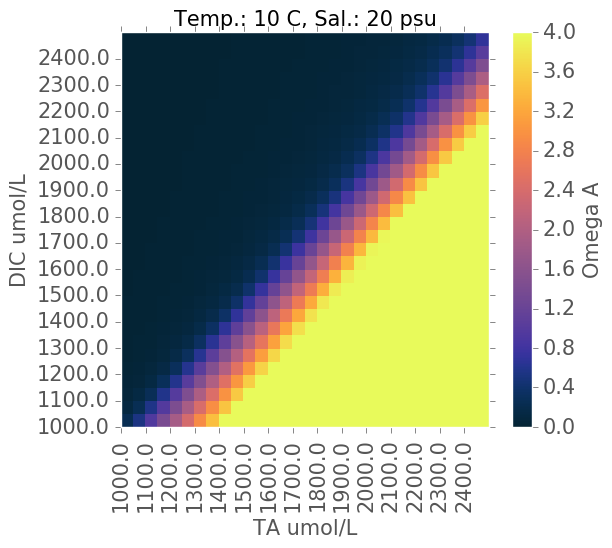

50.0
./C_pco2_T10_S30.jpg


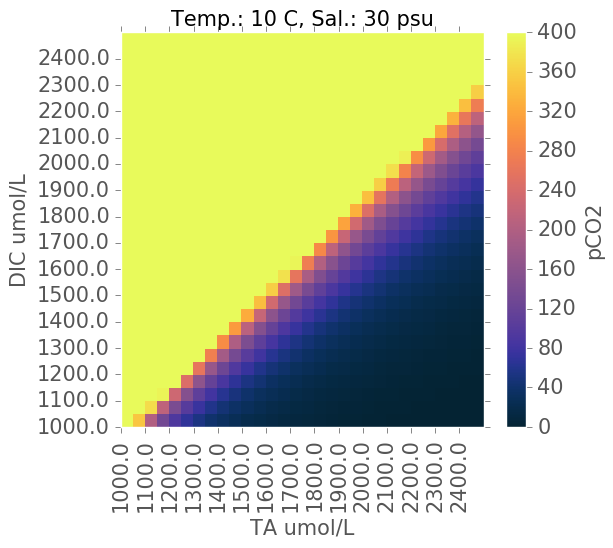

./C_OmA_T10_S30.jpg


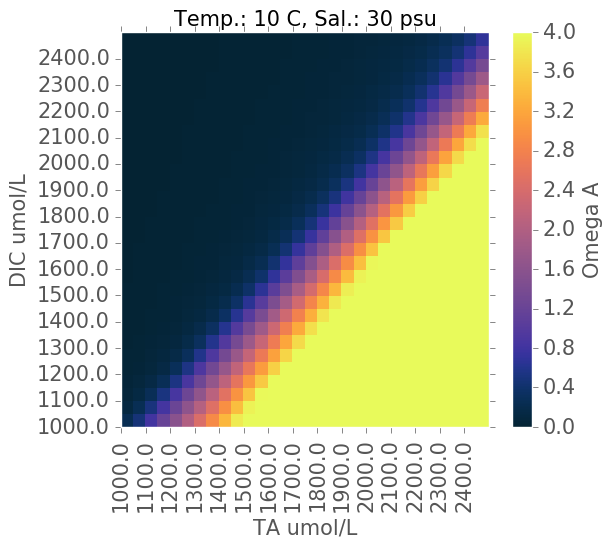

50.0
./C_pco2_T15_S5.jpg


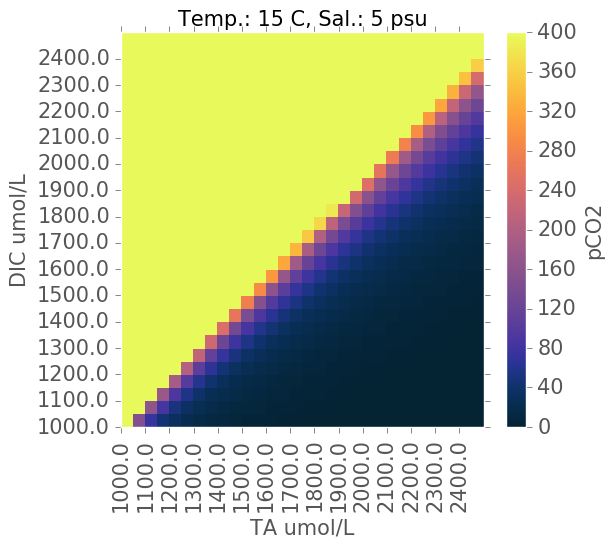

./C_OmA_T15_S5.jpg


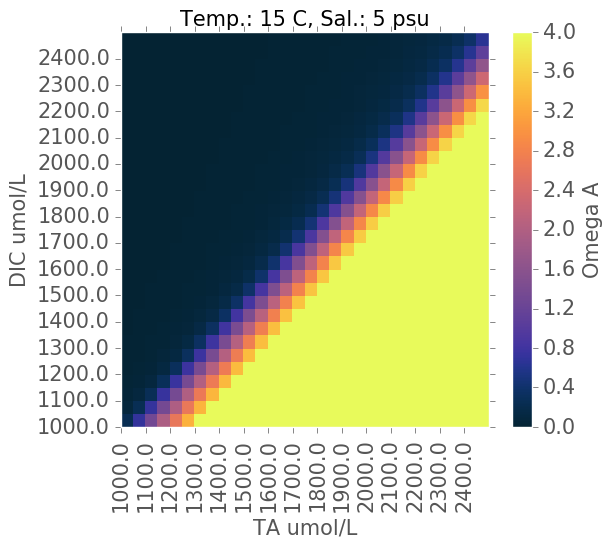

50.0
./C_pco2_T15_S20.jpg


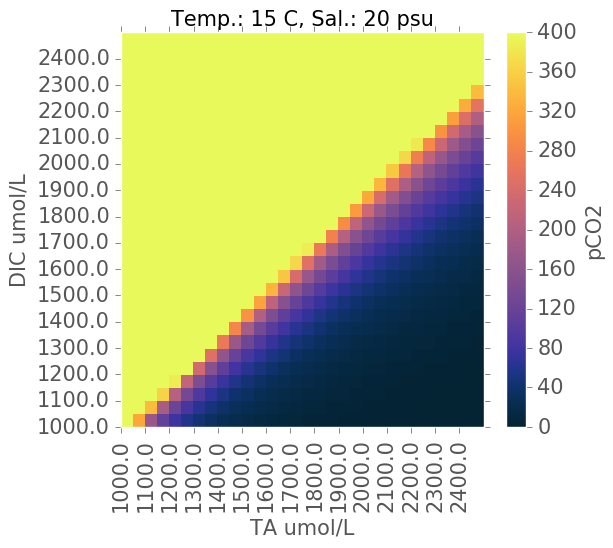

./C_OmA_T15_S20.jpg


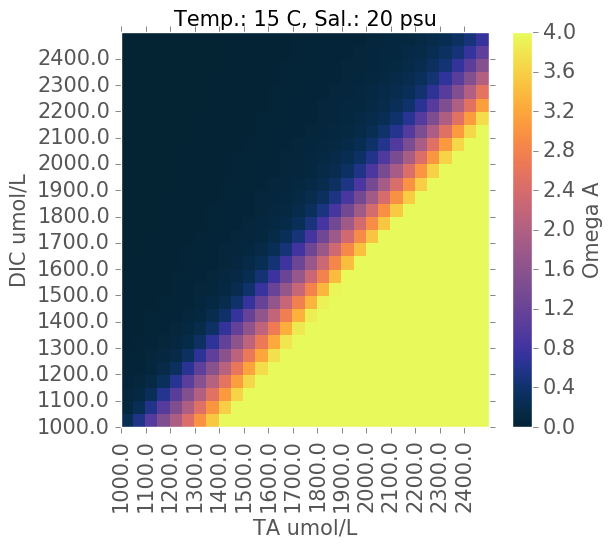

50.0
./C_pco2_T15_S30.jpg


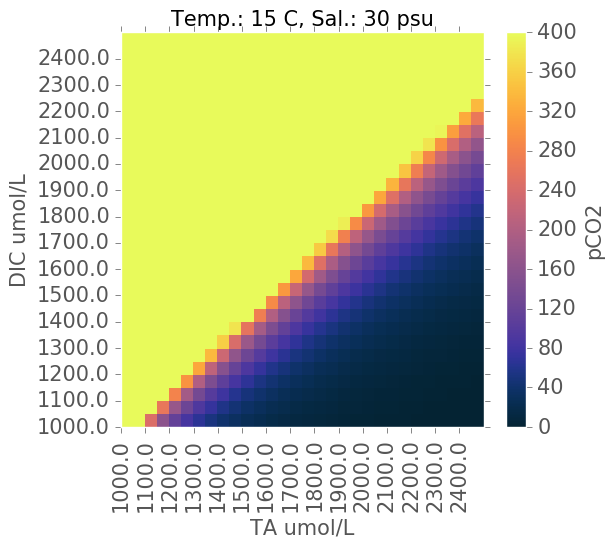

./C_OmA_T15_S30.jpg


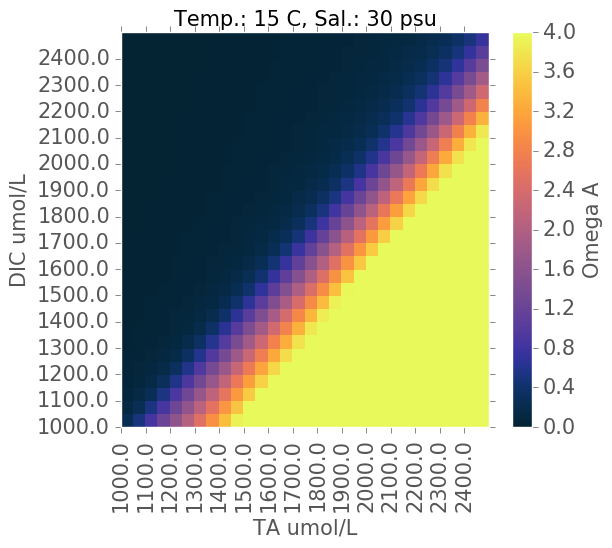

In [12]:
ts = [5,10,15]
ss = [5,20,30]

for i in range(0,len(ts)):
    for j in range(0,len(ss)):
        tT = ts[i]
        tS = ss[j]
        make_plawts_col(tT,tS)


In [27]:
def make_splot_Om(tT,tS):
    v_min = 0
    v_max = 10
    ticsz = 15.5
    lsiz = 15.5
    xdim = 30
    ydim = 30
    t_cm = cm.cm.thermal
    
    TA = np.zeros([ydim,xdim])
    DIC = np.zeros([ydim,xdim])

    S = np.zeros_like(DIC)
    T = np.zeros_like(DIC)
    P = np.zeros_like(DIC)
    S[:] = tS
    T[:] = tT
    P[:] = 1

    topDIC = 2500
    lowDIC = 1000
    topTA = 2500
    lowTA = 1000

    step = (topDIC-lowDIC)/ydim
    print(step)

    for i in range(0,ydim):
        DIC[i,:] = lowDIC + (topDIC-lowDIC)/ydim *(i)
    for i in range(0,xdim):
        TA[:,i] = lowTA + (topTA-lowTA)/ydim *(i)

    Sr = np.ravel(S)
    Tr = np.ravel(T)  
    Pr = np.ravel(P)  
    DICr = np.ravel(DIC) * 1e-3
    TAr = np.ravel(TA) * 1e-3

    zero = DICr *0

    response_tup = mocsy.mvars(temp=Tr, sal=Sr, alk=TAr, dic=DICr, 
                       sil=zero, phos=zero, patm=Pr, depth=zero, lat=zero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

    pHr = pH.reshape(xdim,ydim)
    OmegaAr = OmegaA.reshape(xdim,ydim) 
    pco2r = pco2.reshape(xdim,ydim) 
    

    tplt = OmegaAr
    mesh = ax.pcolormesh(tplt, cmap=t_cm, vmin=v_min, vmax=v_max)
    cbar = fig.colorbar(mesh, ax=ax)
    cbar.set_label('Omega A', fontsize = ticsz)
    cbar.ax.tick_params(labelsize=ticsz)
    major_xSP = np.arange(0, xdim, (1 * fact))
    x_labSP = np.arange(lowTA, topTA, (step* fact))
    ax.set_xticks(major_xSP)
    ax.set_xticklabels(x_labSP,rotation='vertical', fontsize = ticsz) 

    major_ySP = np.arange(0, ydim, (1 * fact))
    y_labSP = np.arange(lowDIC, topDIC, (step* fact))
    ax.set_yticks(major_ySP)
    ax.set_yticklabels(y_labSP, fontsize = ticsz)
    ax.set_ylabel('DIC umol/L', fontsize = lsiz)
    ax.set_xlabel('TA umol/L', fontsize = lsiz)
    ax.set_xlim([0,xdim])
    ax.set_ylim([0,ydim])

    plt.title('Temp.: '+ str(int(T[0,0])) + ' C, Sal.: '+str(int(S[0,0])) + ' psu', fontsize = lsiz)


In [31]:
def make_splot(tT,tS):
    v_min = 0
    v_max = 400
    ticsz = 15.5
    lsiz = 15.5
    xdim = 30
    ydim = 30
    t_cm = cm.cm.thermal
    
    TA = np.zeros([ydim,xdim])
    DIC = np.zeros([ydim,xdim])

    S = np.zeros_like(DIC)
    T = np.zeros_like(DIC)
    P = np.zeros_like(DIC)
    S[:] = tS
    T[:] = tT
    P[:] = 1

    topDIC = 2500
    lowDIC = 1000
    topTA = 2500
    lowTA = 1000

    step = (topDIC-lowDIC)/ydim
    print(step)

    for i in range(0,ydim):
        DIC[i,:] = lowDIC + (topDIC-lowDIC)/ydim *(i)
    for i in range(0,xdim):
        TA[:,i] = lowTA + (topTA-lowTA)/ydim *(i)

    Sr = np.ravel(S)
    Tr = np.ravel(T)  
    Pr = np.ravel(P)  
    DICr = np.ravel(DIC) * 1e-3
    TAr = np.ravel(TA) * 1e-3

    zero = DICr *0

    response_tup = mocsy.mvars(temp=Tr, sal=Sr, alk=TAr, dic=DICr, 
                       sil=zero, phos=zero, patm=Pr, depth=zero, lat=zero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

    pHr = pH.reshape(xdim,ydim)
    OmegaAr = OmegaA.reshape(xdim,ydim) 
    pco2r = pco2.reshape(xdim,ydim) 
    

    tplt = pco2r
    mesh = ax.pcolormesh(tplt, cmap=t_cm, vmin=v_min, vmax=v_max)
    cbar = fig.colorbar(mesh, ax=ax)
    cbar.set_label('pCO2', fontsize = ticsz)
    cbar.ax.tick_params(labelsize=ticsz)
    major_xSP = np.arange(0, xdim, (1 * fact))
    x_labSP = np.arange(lowTA, topTA, (step* fact))
    ax.set_xticks(major_xSP)
    ax.set_xticklabels(x_labSP,rotation='vertical', fontsize = ticsz) 

    major_ySP = np.arange(0, ydim, (1 * fact))
    y_labSP = np.arange(lowDIC, topDIC, (step* fact))
    ax.set_yticks(major_ySP)
    ax.set_yticklabels(y_labSP, fontsize = ticsz)
    ax.set_ylabel('DIC umol/L', fontsize = lsiz)
    ax.set_xlabel('TA umol/L', fontsize = lsiz)
    ax.set_xlim([0,xdim])
    ax.set_ylim([0,ydim])

    plt.title('Temp.: '+ str(int(T[0,0])) + ' C, Sal.: '+str(int(S[0,0])) + ' psu', fontsize = lsiz)


50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0


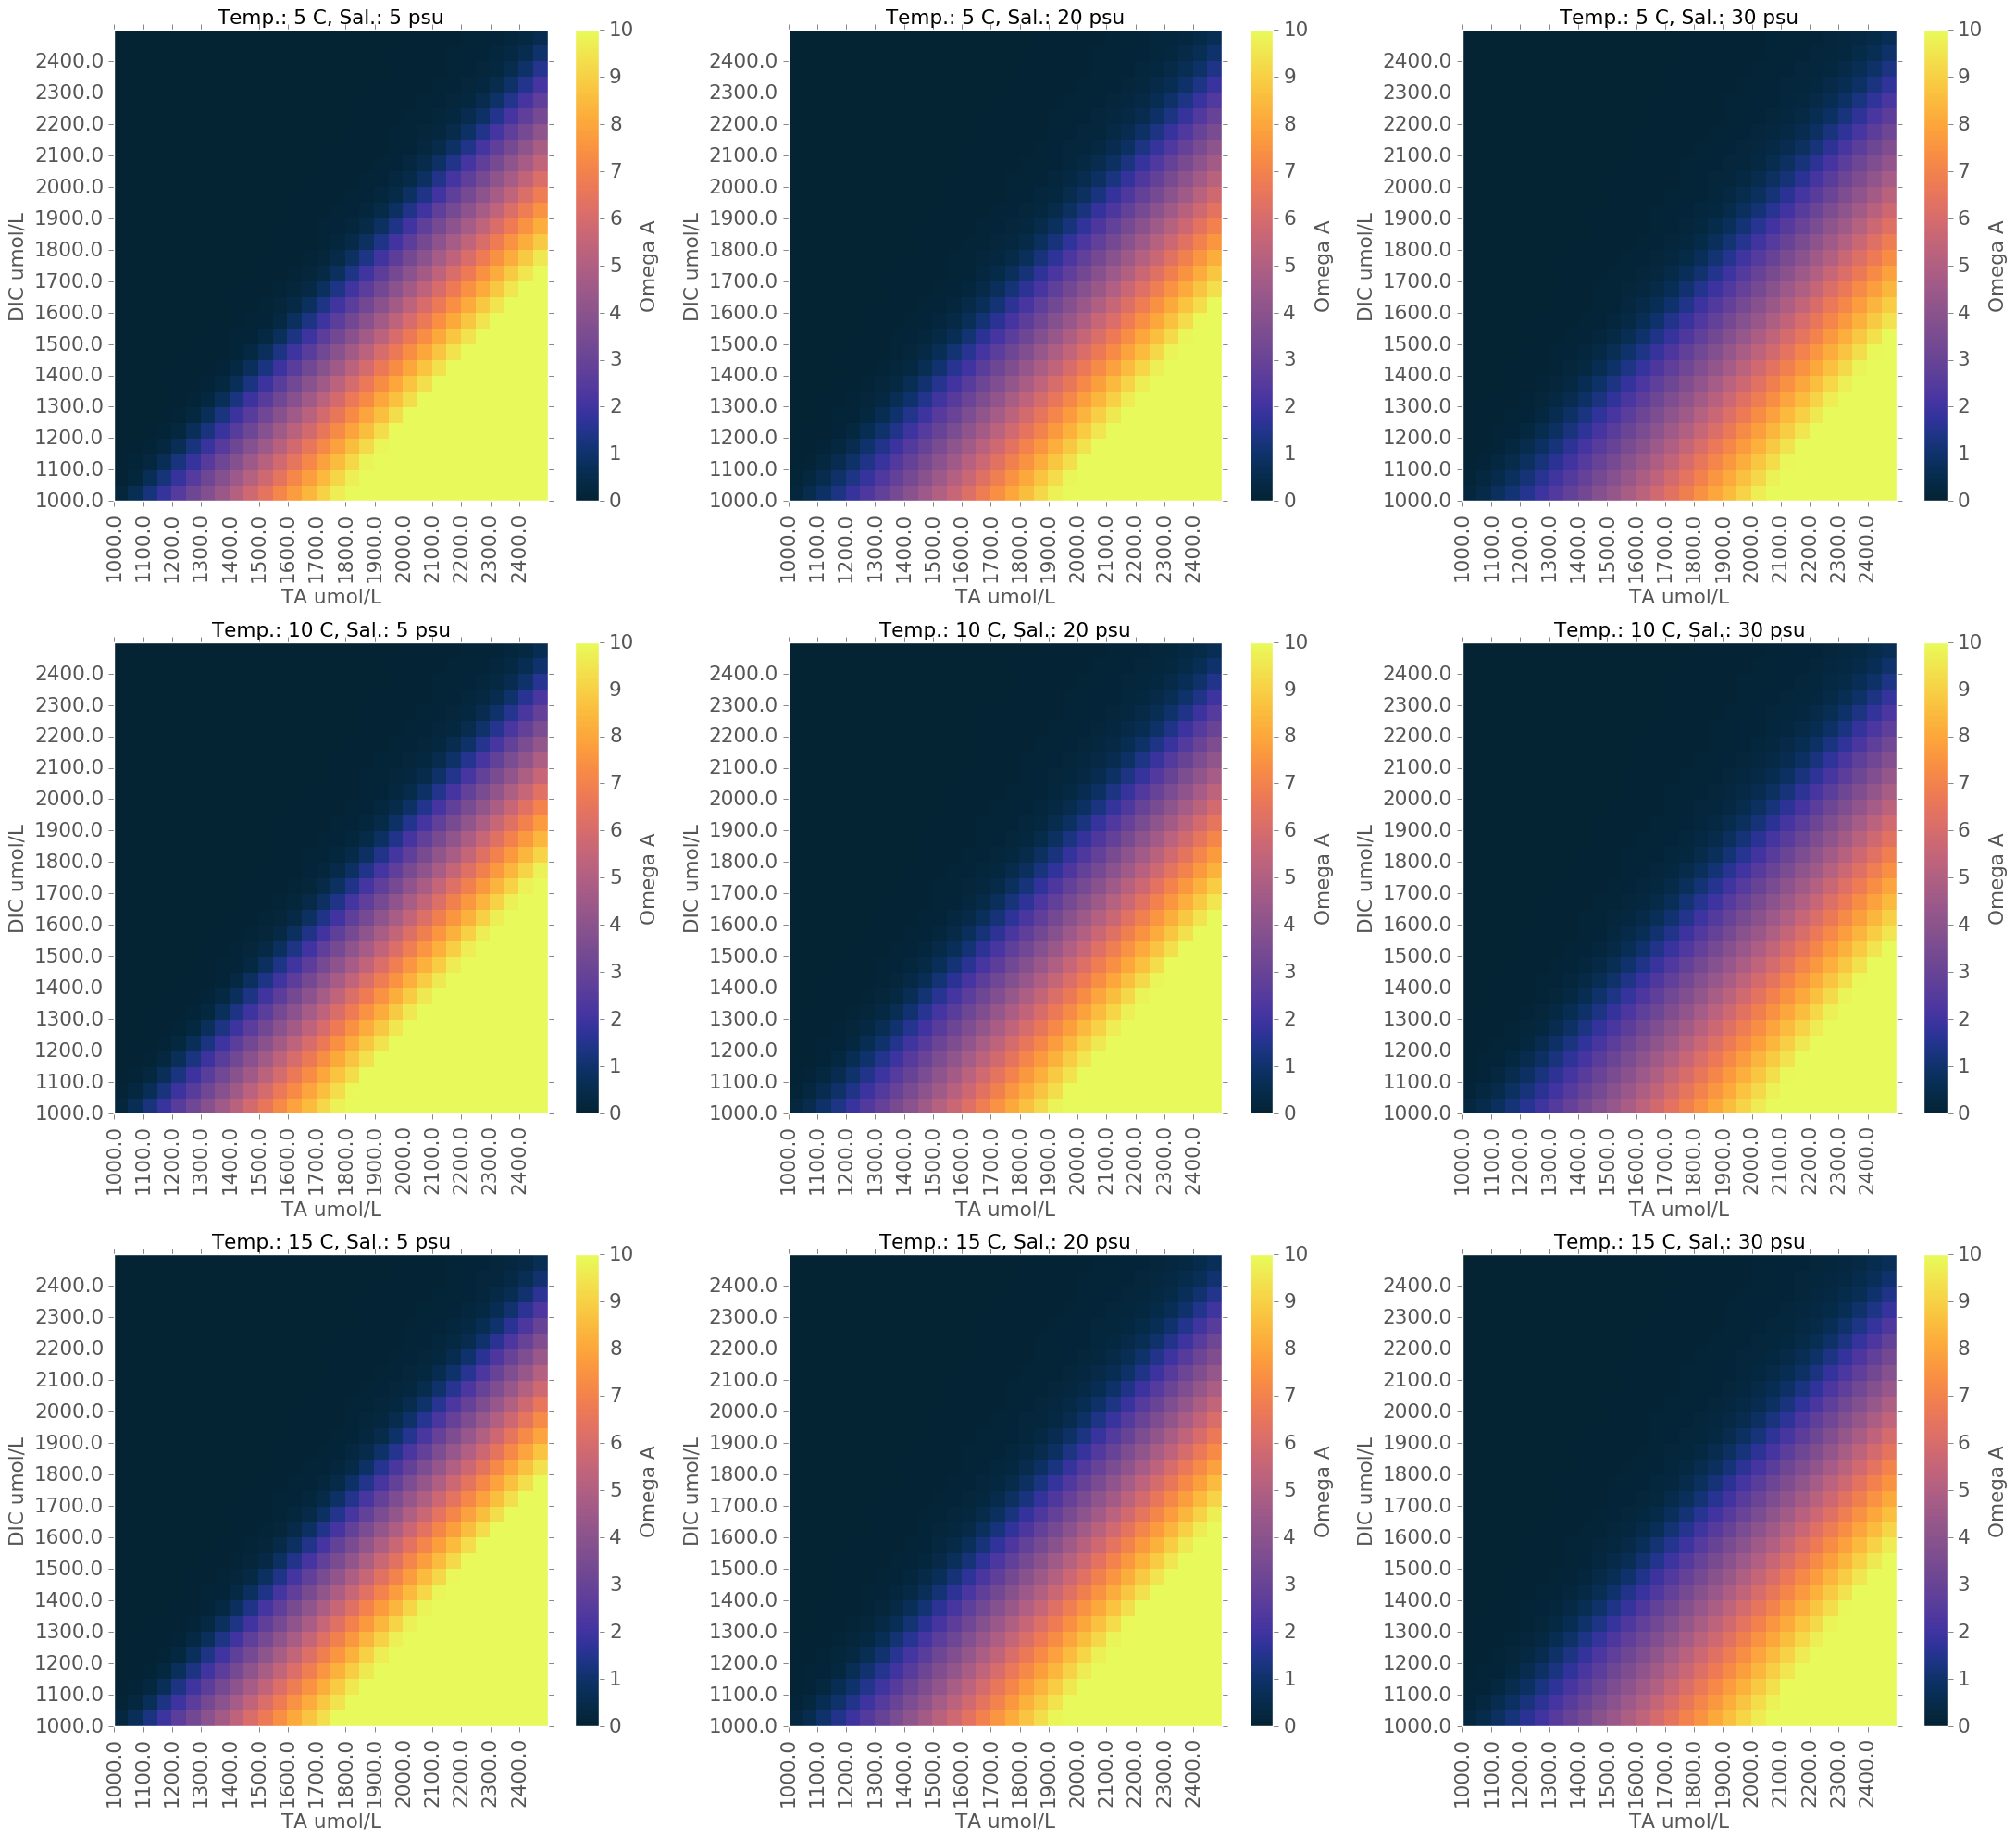

In [28]:
thistit = 'OmA_0_10.jpg'
fact = 2
fig = plt.figure(figsize=(22,20))
nop = 9
for i in range(1,nop+1):
    ax = fig.add_subplot(3,3,i)

    if i == 1:
        tT = 5
        tS = 5
        make_splot_Om(tT,tS)
    
    if i == 2:
        tT = 5
        tS = 20
        make_splot_Om(tT,tS)
 
    if i == 3:
        tT = 5
        tS = 30
        make_splot_Om(tT,tS)

    if i == 4:
        tT = 10
        tS = 5
        make_splot_Om(tT,tS)            
    if i == 5:
        tT = 10
        tS = 20
        make_splot_Om(tT,tS)                    
    if i == 6:
        tT = 10
        tS = 30
        make_splot_Om(tT,tS)                            
    if i == 7:
        tT = 15
        tS = 5
        make_splot_Om(tT,tS)                                    
    if i == 8:
        tT = 15
        tS = 20
        make_splot_Om(tT,tS)                                            
    if i == 9:
        tT = 15
        tS = 30
        make_splot_Om(tT,tS)   
        
fig.tight_layout()            
fig.savefig(thistit)    
  # otherwise the right y-label is slightly clipped
plt.show()


50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0


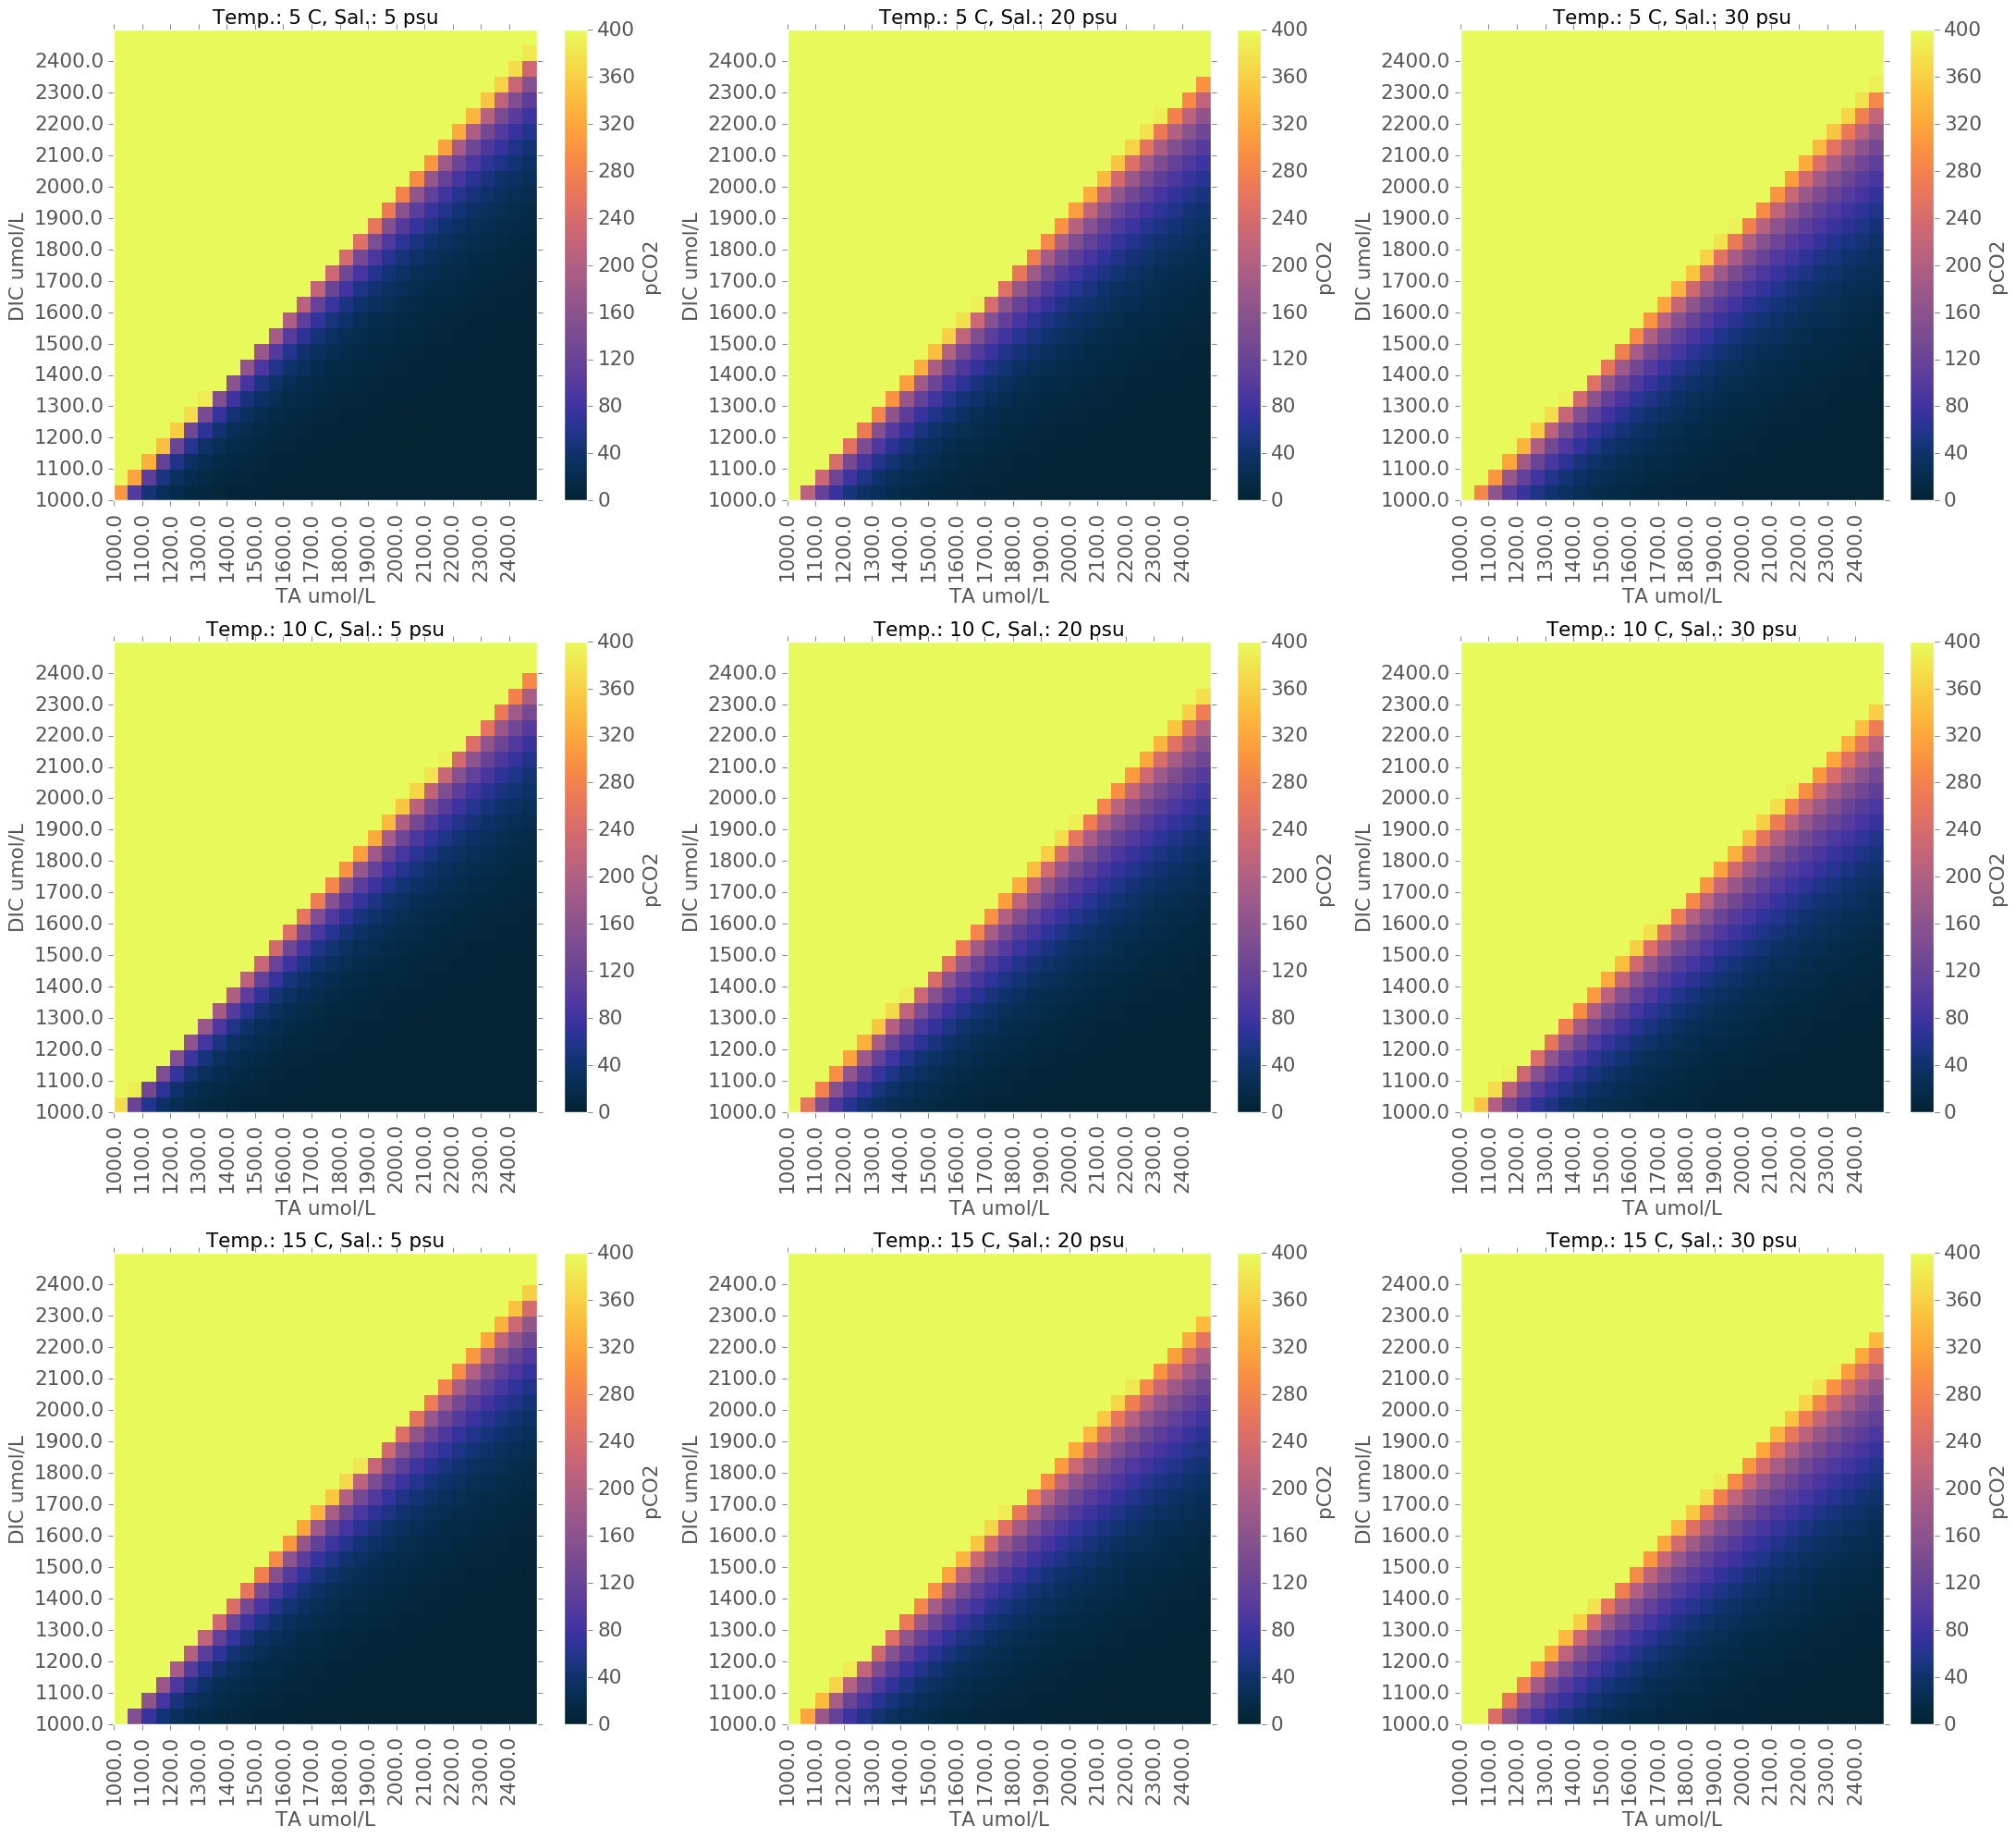

In [32]:
thistit = 'pco2_0_400.jpg'
fact = 2
fig = plt.figure(figsize=(22,20))
nop = 9
for i in range(1,nop+1):
    ax = fig.add_subplot(3,3,i)

    if i == 1:
        tT = 5
        tS = 5
        make_splot(tT,tS)
    
    if i == 2:
        tT = 5
        tS = 20
        make_splot(tT,tS)
 
    if i == 3:
        tT = 5
        tS = 30
        make_splot(tT,tS)

    if i == 4:
        tT = 10
        tS = 5
        make_splot(tT,tS)            
    if i == 5:
        tT = 10
        tS = 20
        make_splot(tT,tS)                    
    if i == 6:
        tT = 10
        tS = 30
        make_splot(tT,tS)                            
    if i == 7:
        tT = 15
        tS = 5
        make_splot(tT,tS)                                    
    if i == 8:
        tT = 15
        tS = 20
        make_splot(tT,tS)                                            
    if i == 9:
        tT = 15
        tS = 30
        make_splot(tT,tS)   
        
fig.tight_layout()            
fig.savefig(thistit)    
  # otherwise the right y-label is slightly clipped
plt.show()
